In [303]:
import numpy as np
import matplotlib.pyplot as plt

from importlib import reload
from tblib import lattice
from tblib import hamiltonian

reload(lattice)
reload(hamiltonian)

<module 'tblib.hamiltonian' from 'c:\\Users\\atsch\\Desktop\\MasterVorlesungen\\Masterthesis\\Code\\tblib\\hamiltonian.py'>

In [304]:
N=2

lat = lattice.dDiagonallyStripedLattice(N=N)
ham = hamiltonian.Model(N=N, T=0, kind='dDSL', delta=[3,3], U=[0.56,0.56], mu=[-4.68,-4.68])

In [305]:
H = ham.Hk(2,0)[0]

evals1, Evec = np.linalg.eigh(H)
Evec = Evec.T


In [306]:
vbar = Evec[:6, 0:6]
ubar = Evec[:6, 6:]

Evec2 = np.flip(Evec, axis=0)
u = Evec2[0:6, 0:6]
v = Evec2[0:6, 6:]

In [307]:
U = np.zeros((12,12), dtype=complex)
U[0:6,0:6] = u
U[0:6,6:] = v
U[6:,0:6] = vbar
U[6:,6:] = ubar

In [308]:
np.diag(np.matmul(U, np.matmul(H, np.conjugate(U.T))))

array([ 6.79290191-1.01068060e-17j,  6.79290191-7.04236480e-17j,
        5.55899271+2.44439625e-16j,  5.55899271+1.49576642e-16j,
        4.37763009-5.73092551e-17j,  4.37763009-2.08866410e-17j,
       -6.79290191+2.83923413e-17j, -6.79290191+8.47558572e-18j,
       -5.55899271+8.00532345e-17j, -5.55899271-1.36057435e-16j,
       -4.37763009-1.15749968e-17j, -4.37763009+9.30581206e-19j])

In [309]:
dels, nus = ham.Deltra(40,HF=True, alpha=0.7, Nmin=30, Nmax=1340)

In [310]:
n2 = ham.striped_props()[2]

In [311]:
np.sum(n2)

(2.864672426873982e-05+1.8820983031273385e-25j)

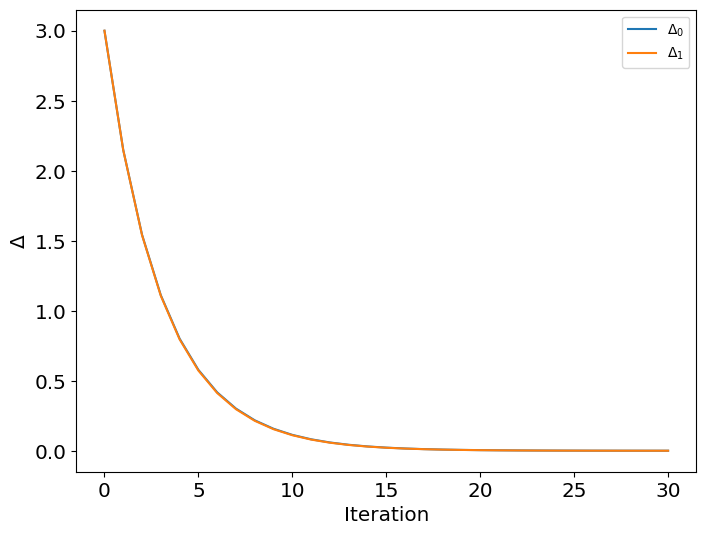

In [312]:
plt.figure(figsize=(8,6))
plt.xlabel('Iteration', size='x-large')
plt.ylabel(r'$\Delta$', size='x-large')
plt.xticks(size='x-large')
plt.yticks(size='x-large')
#plt.ylim(0,0.35)

#plt.plot(np.arange(len(dels[0])), dels[0], label = r'$\Delta_A$')
#plt.plot(np.arange(len(dels[0])), dels[1], label = r'$\Delta_B$')
#plt.plot(np.arange(len(dels[0])), dels[2], label = r'$\Delta_C$')
for i,d in enumerate(dels):
    plt.plot(np.arange(len(dels[0])), np.real(d), label = f'$\Delta_{i}$')

plt.legend()

plt.show()

C:\Users\atsch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


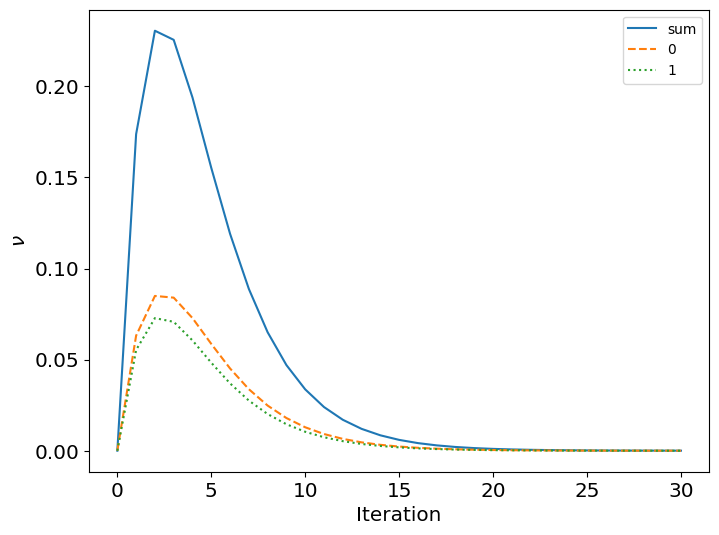

In [313]:
s1 = [np.sum(nus[:,i])+nus[1,i] for i in range(np.shape(nus)[1])]

plt.figure(figsize=(8,6))
plt.xlabel('Iteration', size='x-large')
plt.ylabel(r'$\nu$', size='x-large')
plt.xticks(size='x-large')
plt.yticks(size='x-large')
#plt.ylim(0,0.35)
colors=['dashed', 'dotted', 'dashdot']
plt.plot(np.arange(len(s1)), s1, label = r'sum')
for i in range(2):
    plt.plot(np.arange(len(s1)),nus[i],linestyle=colors[i], label=f'{i}')

plt.legend()
plt.show()

In [314]:
np.linspace(-5,1,20)

array([-5.        , -4.68421053, -4.36842105, -4.05263158, -3.73684211,
       -3.42105263, -3.10526316, -2.78947368, -2.47368421, -2.15789474,
       -1.84210526, -1.52631579, -1.21052632, -0.89473684, -0.57894737,
       -0.26315789,  0.05263158,  0.36842105,  0.68421053,  1.        ])

In [315]:
np.std(np.abs(dels[:,-3:]), axis=1)

array([6.32765369e-05, 5.92608601e-05])

In [316]:
ham.delta

array([0.00016803+3.09569323e-22j, 0.00015567-1.25218300e-20j])

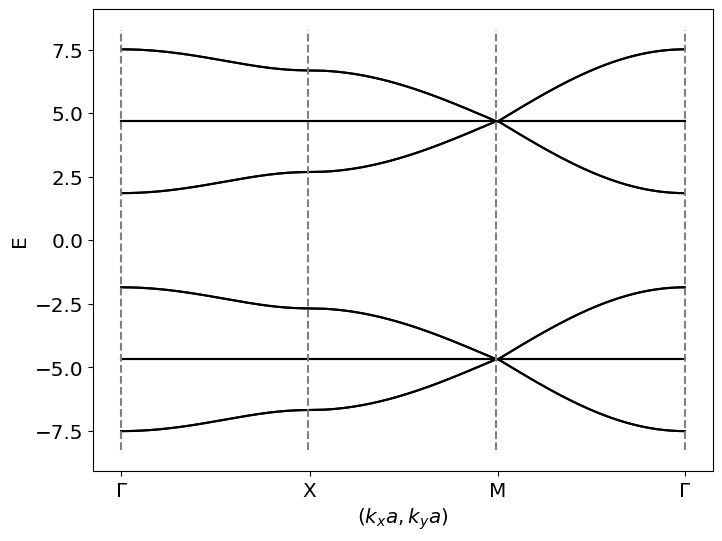

In [317]:
ham.plot_bands()

In [318]:
(np.std(np.abs(dels[:,-3:]), axis=1)>0.01).any()

False

In [319]:
np.std(np.abs(dels[:,-3:]), axis=1)>0.01

array([False, False])

In [320]:
dels

array([[3.00000000e+00+0.00000000e+00j, 2.14840192e+00-5.97562669e-22j,
        1.54306088e+00-1.80866324e-21j, 1.11071445e+00+5.30389532e-21j,
        8.00659601e-01-5.29185385e-20j, 5.77646966e-01-4.58260043e-20j,
        4.16942994e-01-2.75488190e-20j, 3.01017287e-01-2.76761395e-20j,
        2.17346794e-01-1.83360843e-20j, 1.56940359e-01-1.21615569e-20j,
        1.13324073e-01-1.57772624e-20j, 8.18294290e-02-1.87278085e-20j,
        5.90872692e-02-1.48745625e-20j, 4.26652514e-02-1.16038101e-20j,
        3.08070709e-02-7.72774503e-21j, 2.22444802e-02-5.55191740e-21j,
        1.60616451e-02-4.46111798e-21j, 1.15972198e-02-3.22021119e-21j,
        8.37363468e-03-2.13494807e-21j, 6.04603331e-03-1.11057555e-21j,
        4.36539532e-03-4.64408481e-22j, 3.15190581e-03-3.75822980e-22j,
        2.27572386e-03-1.74633643e-22j, 1.64309485e-03-1.46312753e-23j,
        1.18632176e-03-8.82725420e-24j, 8.56523306e-04+3.26837752e-22j,
        6.18404635e-04+4.69137213e-22j, 4.46481205e-04+5.9197870